<h2>K-Means clustering introduction</h2>

In [17]:
set.seed(20) # always set seed, so that output is reproducible
library(ISLR)

In [4]:
x = matrix(rnorm(50*2), ncol=2)
x[1:25,1] = x[1:25,1]+3
x[1:25,2] = x[1:25,2]-4

In [11]:
#builds K-means cluster with number of clusters k=2, and attempts nstart=20 times (and reports only the best results)
km.out = kmeans(x, 2, nstart=20)
names(km.out)

[1] "cluster"      "centers"      "totss"        "withinss"     "tot.withinss"
[6] "betweenss"    "size"         "iter"         "ifault"

In [9]:
km.out$cluster

[1] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1
[39] 1 1 1 1 1 1 1 1 1 1 1 1

**As we see above K-Means perfectly clustered the data, although we didnt supply any group information to K-Means**

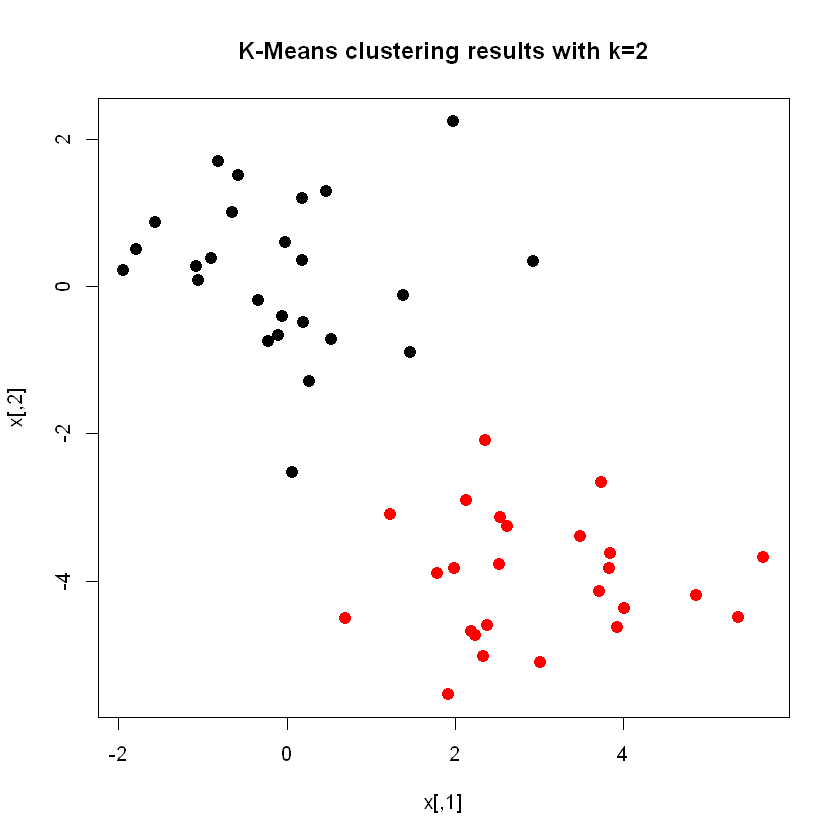

In [10]:
plot(x, col=km.out$cluster, main = "K-Means clustering results with k=2", pch=20, cex=2)

In [16]:
km.out = kmeans(x, 3, nstart=1)
names(km.out)

km.out$tot.withinss

km.out = kmeans(x, 3, nstart=20)
names(km.out)

km.out$tot.withinss

[1] "cluster"      "centers"      "totss"        "withinss"     "tot.withinss"
[6] "betweenss"    "size"         "iter"         "ifault"

[1] 87.96265

[1] "cluster"      "centers"      "totss"        "withinss"     "tot.withinss"
[6] "betweenss"    "size"         "iter"         "ifault"

[1] 82.1842

**As we see in output above, the the within cluster variance reduces as nstart is increased from 1 to 20.
Always run kmeans with nstart as a high number like 20.**

<h2>Hierarchial clustering introduction</h2>

In [47]:
# Build three hierarchial clusters based on the 3 linkage methods - complete, average and single
data.dist = dist(x)
hc.complete = hclust(data.dist, method="complete")
hc.average = hclust(data.dist, method="average")
hc.single = hclust(data.dist, method="single")

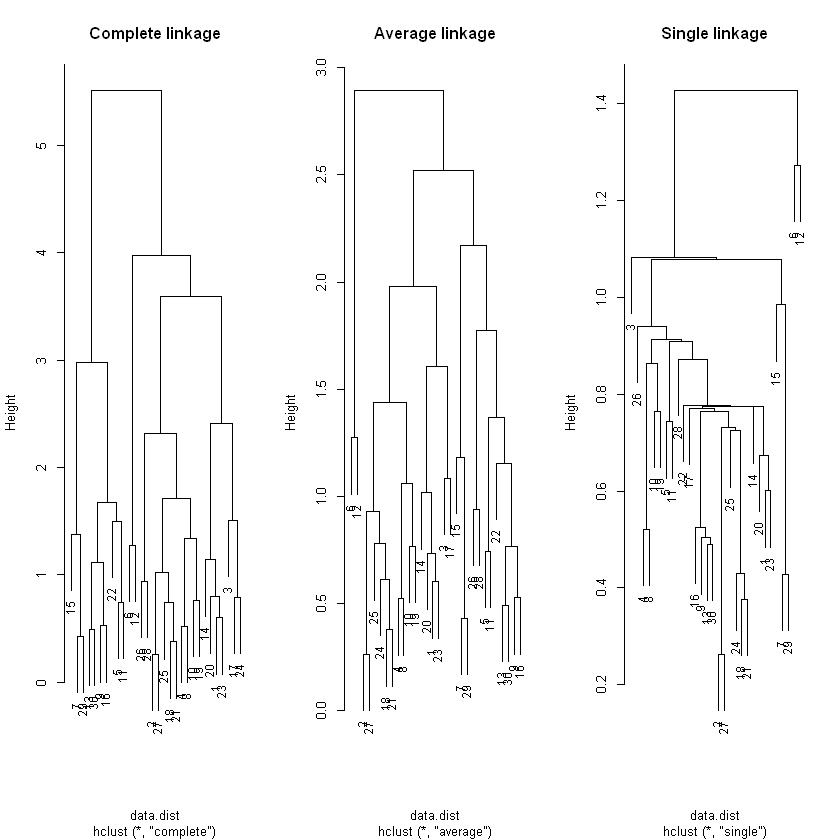

In [48]:
par(mfrow=c(1, 3))
plot(hc.complete, main="Complete linkage", cex=0.9)
plot(hc.average, main="Average linkage", cex=0.9)
plot(hc.single, main="Single linkage", cex=0.9)

In [28]:
# cut the tree to get the desired number of clusters
cutree(hc.complete, 2)

[1] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 1 2 2 2 2 2 2
[39] 2 2 2 2 2 2 2 2 2 2 2 2

In [29]:
cutree(hc.average, 2)

[1] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2
[39] 2 2 2 2 2 2 2 2 2 2 2 2

In [30]:
cutree(hc.single, 2)

[1] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1
[39] 1 1 1 1 1 1 1 1 1 1 1 1

In [33]:
cutree(hc.single, 4)

[1] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 3 2 2 2 2 4 2 2
[39] 2 2 2 2 2 2 2 2 2 2 2 2

**Scale the variables before applying hierarchial clustering or any clustering**

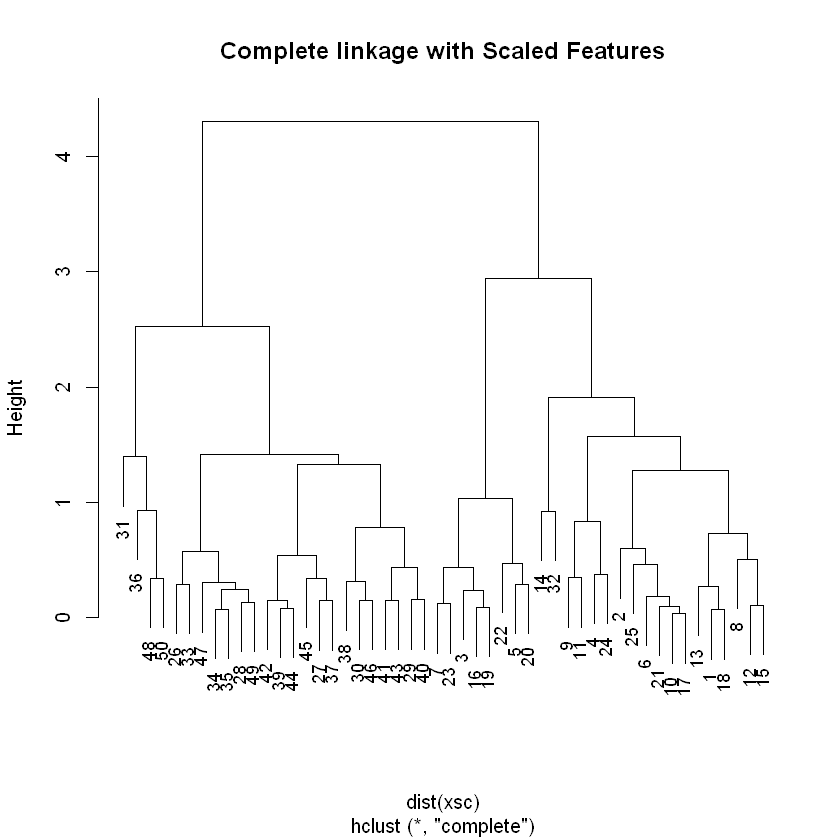

In [37]:
xsc = scale(x)
plot(hclust(dist(xsc), method="complete"), main="Complete linkage with Scaled Features", cex=0.9)

<h3>Correlation Based Hierarchial Clustering</h3>

**Correlation based clustering makes sense with atleast 3 or more features**

In [40]:
x = matrix(rnorm(30*3), ncol=3)
dd = as.dist(1-cor(t(x)))

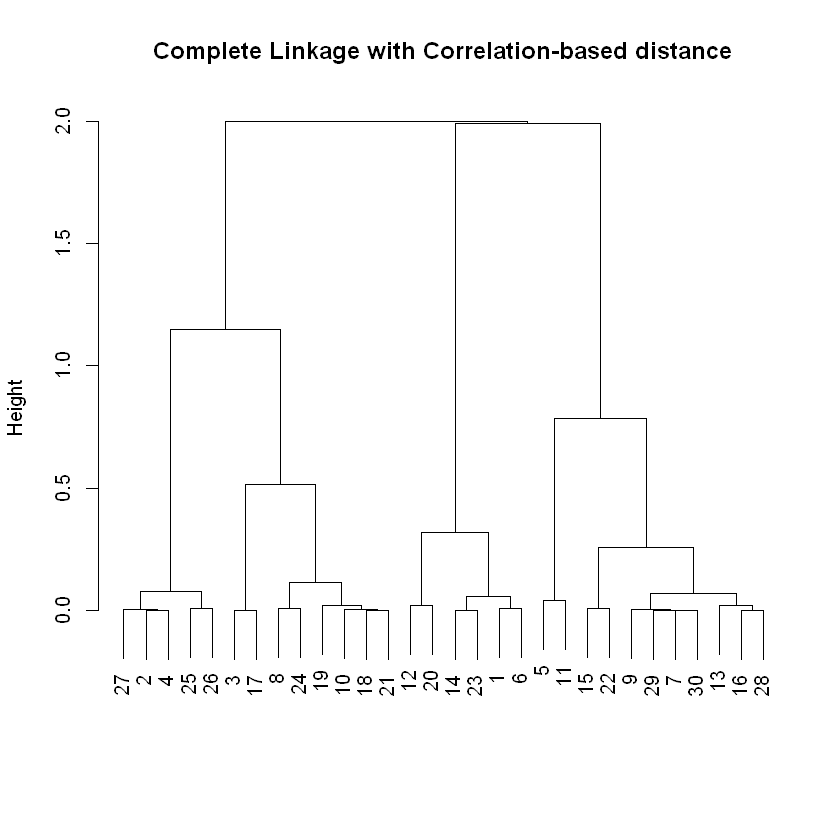

In [44]:
plot(hclust(dd, method="complete"), main="Complete Linkage with Correlation-based distance", xlab="", sub="")

<h2>Clustering on Genomic data</h2>

In [54]:
head(NCI60$data)

,1,2,3,4,5,6,7,8,9,10,...,6821,6822,6823,6824,6825,6826,6827,6828,6829,6830
V1,0.300000,1.180000,0.550000,1.140000,-0.265000,-7.000000e-02,0.350000,-0.315000,-0.45000000,-0.65498050,...,-0.9900195,0.000000,0.030000,-0.175000,0.6299805,-0.030000,0.0000000,0.280000,-0.340000,-1.930000
V2,0.679961,1.289961,0.169961,0.379961,0.464961,5.799610e-01,0.699961,0.724961,-0.04003899,-0.28501950,...,-0.2700585,-0.300039,-0.250039,-0.535039,0.1099415,-0.860039,-1.2500490,-0.770039,-0.390039,-2.000039
V3,0.940000,-0.040000,-0.170000,-0.040000,-0.605000,0.000000e+00,0.090000,0.645000,0.43000000,0.47501950,...,0.3199805,0.120000,-0.740000,-0.595000,-0.2700195,-0.150000,0.0000000,-0.120000,-0.410000,0.000000
V4,0.280000,-0.310000,0.680000,-0.810000,0.625000,-1.387779e-17,0.170000,0.245000,0.02000000,0.09501949,...,-1.2400200,-0.110000,-0.160000,0.095000,-0.3500195,-0.300000,-1.1500100,1.090000,-0.260000,-1.100000
V5,0.485000,-0.465000,0.395000,0.905000,0.200000,-5.000000e-03,0.085000,0.110000,0.23500000,1.49001949,...,0.5549805,-0.775000,-0.515000,-0.320000,0.6349805,0.605000,0.0000000,0.745000,0.425000,0.145000
V6,0.310000,-0.030000,-0.100000,-0.460000,-0.205000,-5.400000e-01,-0.640000,-0.585000,-0.77000000,-0.24498050,...,-0.5900195,0.000000,-0.740000,-2.095000,-1.3900200,-0.400000,0.6999902,0.290000,0.550000,0.000000


In [55]:
head(NCI60$labs)

[1] "CNS"    "CNS"    "CNS"    "RENAL"  "BREAST" "CNS"

In [46]:
sd.data = scale(NCI60$data)

In [49]:
# Build three hierarchial clusters based on the 3 linkage methods - complete, average and single
data.dist = dist(sd.data)
hc.complete = hclust(data.dist, method="complete")
hc.average = hclust(data.dist, method="average")
hc.single = hclust(data.dist, method="single")

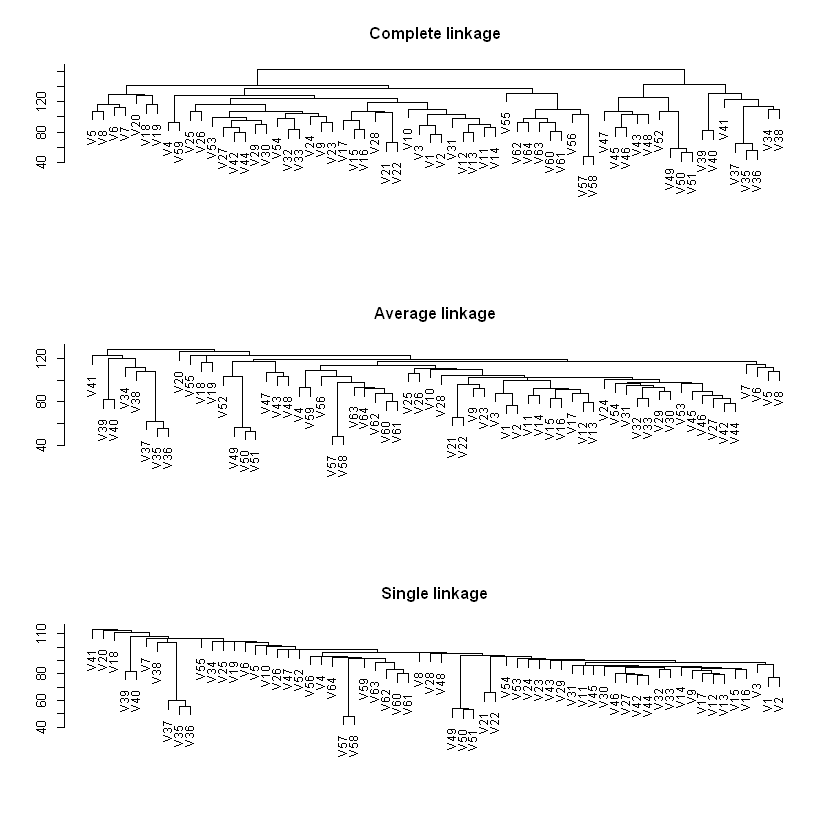

In [53]:
par(mfrow=c(3, 1))
plot(hc.complete, main="Complete linkage", cex=0.9, xlab="", ylab="", sub="")
plot(hc.average, main="Average linkage", cex=0.9, xlab="", ylab="", sub="")
plot(hc.single, main="Single linkage", cex=0.9, xlab="", ylab="", sub="")

** From above graphs we can note that: **
    * Complete or Average linkage products balanced clusters
    * Clearly the terminal nodes as they rollup, show that the records cluster together with a single cancer type

In [60]:
hc.clusters = cutree(hc.complete, 4)
table(hc.clusters, NCI60$labs)

           
hc.clusters BREAST CNS COLON K562A-repro K562B-repro LEUKEMIA MCF7A-repro
          1      2   3     2           0           0        0           0
          2      3   2     0           0           0        0           0
          3      0   0     0           1           1        6           0
          4      2   0     5           0           0        0           1
           
hc.clusters MCF7D-repro MELANOMA NSCLC OVARIAN PROSTATE RENAL UNKNOWN
          1           0        8     8       6        2     8       1
          2           0        0     1       0        0     1       0
          3           0        0     0       0        0     0       0
          4           1        0     0       0        0     0       0

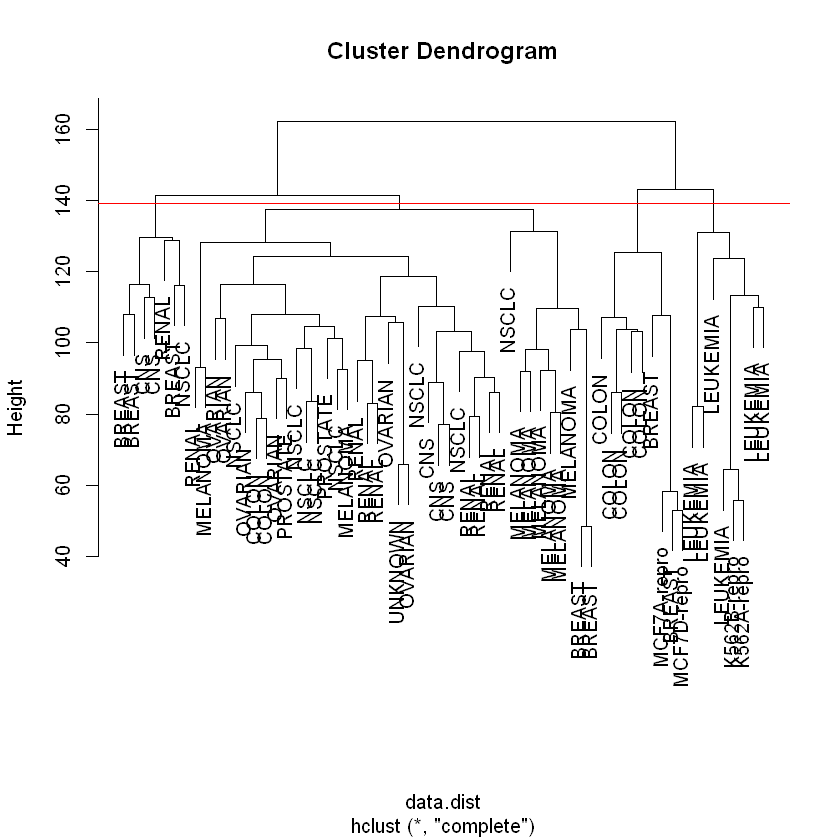

In [61]:
par(mfrow=c(1,1))
plot(hc.complete, labels = NCI60$labs)
abline(h=139, col="red")

In [62]:
hc.complete


Call:
hclust(d = data.dist, method = "complete")

Cluster method   : complete 
Distance         : euclidean 
Number of objects: 64 


<h4>Compare the clustering results between K-Means vs Hierarchial clustering, with the same number of output clusters</h4>

In [64]:
km.out = kmeans(sd.data, 4, nstart=20)
km.clusters = km.out$cluster

table(km.clusters, hc.clusters)

           hc.clusters
km.clusters  1  2  3  4
          1 11  0  0  9
          2 20  7  0  0
          3  9  0  0  0
          4  0  0  8  0

**As we see above the results obtained between K-Means vs Hierarchial clustering does not match. Ideally the highest number would be on the diagonal line**

<h3>We can do Hierarchial clustering on Principal components</h3>

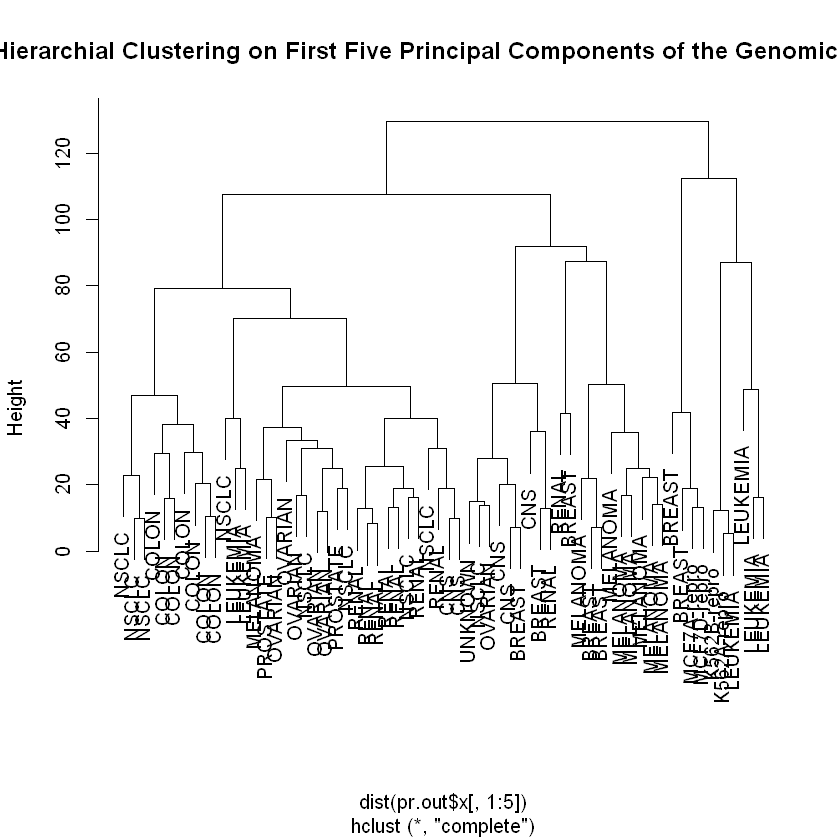

In [74]:
pr.out = prcomp(NCI60$data, scale=TRUE)
hc.out = hclust(dist(pr.out$x[,1:5]), method="complete")
plot(hc.out, labels=NCI60$labs, main="Hierarchial Clustering on First Five Principal Components of the Genomic data")